In [335]:
import pandas as pd
#import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [336]:
data = pd.read_csv('D:ElliotSystems/zomato_stock_data.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# data["Date"] = data.index
df = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.set_index('Date', inplace = True)
#df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
print(df.head(5))




                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

               Volume  
Date                   
2021-07-23  694895290  
2021-07-26  249723854  
2021-07-27  240341900  
2021-07-28  159793731  
2021-07-29  117973089  


C:\Users\valla\AppData\Local\Temp\ipykernel_18936\2028288236.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [337]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351
2024-05-21,194.399994,196.500000,188.750000,189.100006,189.100006,33453174
2024-05-22,190.000000,190.000000,183.350006,185.500000,185.500000,40354936


In [338]:
start_date = '2021-07-23'
end_date = '2024-05-22'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2021-07-23  End Date: 2024-05-22


In [339]:
# ticker = 'TSLA'

# df = yf.download(ticker, start=start_date, end=end_date)
# df

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2021-07-23 to 2024-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       698 non-null    float64
 1   High       698 non-null    float64
 2   Low        698 non-null    float64
 3   Close      698 non-null    float64
 4   Adj Close  698 non-null    float64
 5   Volume     698 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.2 KB


In [341]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [342]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

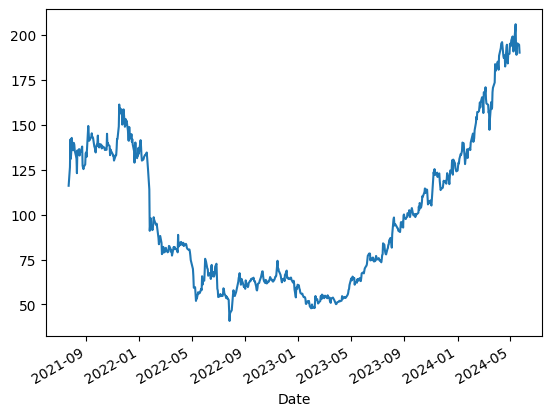

In [343]:
df['Open'].plot()

<Axes: xlabel='Date'>

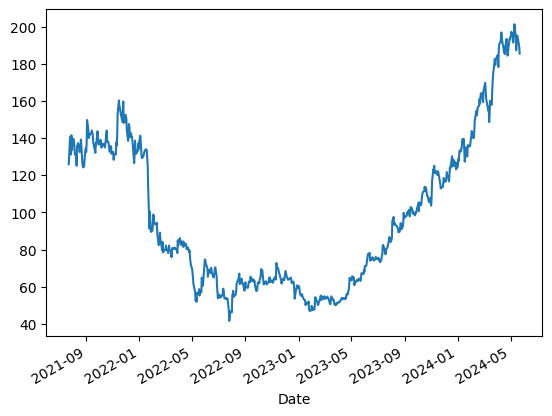

In [344]:
df['Close'].plot()

In [345]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10
Date,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,133.324997
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,133.183329
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,132.687496
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,134.459998
2021-07-30,142.600006,142.699997,131.000000,133.500000,133.500000,88312522,134.299998
2021-08-02,135.750000,140.750000,135.149994,139.699997,139.699997,66909732,135.071426
2021-08-03,137.000000,140.800003,137.000000,139.399994,139.399994,46610001,135.612497
2021-08-04,139.800003,141.000000,135.250000,138.399994,138.399994,41134419,135.922219


<Axes: xlabel='Date'>

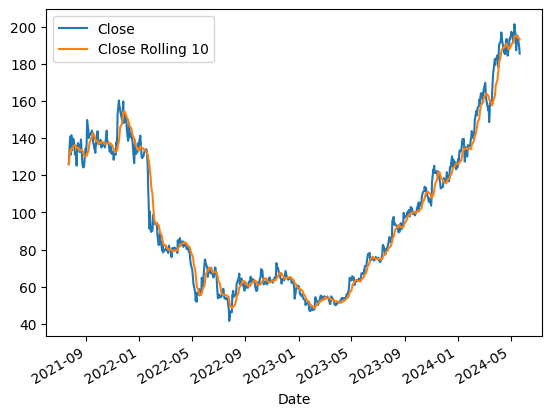

In [346]:
df[['Close','Close Rolling 10']].plot()

In [347]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [348]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Date,,,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,126.000000,126.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,133.324997,133.324997,133.324997
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,133.183329,133.183329,133.183329
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,132.687496,132.687496,132.687496
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997,194.545000,190.575000,180.175000
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593,194.520000,190.931667,180.892000
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351,194.280000,191.323333,181.480000


<Axes: xlabel='Date'>

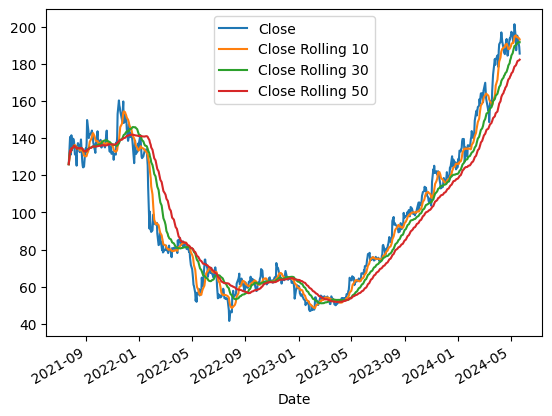

In [349]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [350]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Date,,,,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,126.000000,126.000000,126.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,133.324997,133.324997,133.324997,133.324997
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,133.183329,133.183329,133.183329,133.183329
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,132.687496,132.687496,132.687496,132.687496
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,134.459998,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...,...
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997,194.545000,190.575000,180.175000,97.511167
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593,194.520000,190.931667,180.892000,97.651727
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351,194.280000,191.323333,181.480000,97.791379


In [351]:
# df[['Close','CMA']].plot()

In [352]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [353]:
adf_test(df['Close'])

ADF Statistics: -0.055582613945341294
p- value: 0.9536868667248083
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [354]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Date,,,,,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,126.000000,126.000000,126.000000,126.000000,NaN
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,133.324997,133.324997,133.324997,133.324997,14.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,133.183329,133.183329,133.183329,133.183329,-7.750000
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,132.687496,132.687496,132.687496,132.687496,-1.699997
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,134.459998,134.459998,134.459998,134.459998,10.350006


In [355]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -27.05623212942083
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

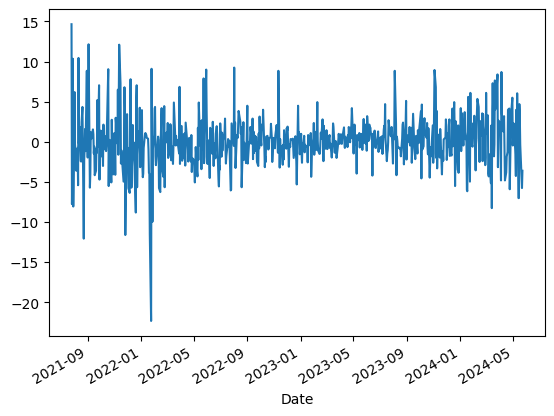

In [356]:
df['First Difference'].dropna().plot()

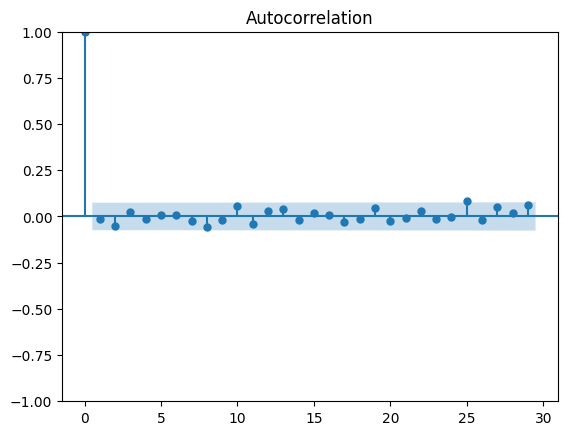

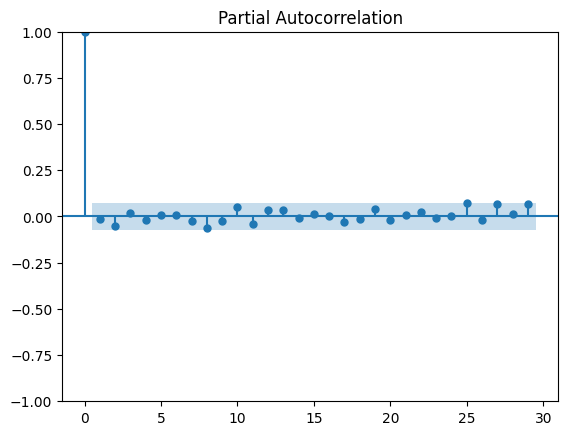

In [357]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [358]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4091.540, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3916.452, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4089.563, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3815.414, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3775.349, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3745.624, Time=0.23 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3724.955, Time=0.22 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=3722.990, Time=0.07 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=3743.654, Time=0.07 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1855.495
Date:                Tue, 17 Dec 2024   AIC                           3722.990
Time:                        13:16:18   BIC                           3750.262
Sample:                             0   HQIC                          3733.535
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8396      0.024    -35.314      0.000      -0.886      -0.793
ar.L2         -0.7242      0.031    -23.597      0.000      -0.784      -0.664
ar.L3         -0.5214      0.034    -15.218      0.000      -0.589      -0.454
ar.L4         -0.3612      0.035    -10.289      0.000      -0.430      -0.292
ar.L5         -0.1856      0.031     -5.996      0.000      -0.246      -0.125
sigma2        12.0905      0.408     29.661      0.000      11.292      12.889
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               336.61
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [359]:
model_ARIMA=ARIMA(df['Close'],order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary startin

In [360]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  698
Model:                ARIMA(15, 2, 3)   Log Likelihood               -1797.930
Date:                Tue, 17 Dec 2024   AIC                           3633.860
Time:                        13:16:21   BIC                           3720.222
Sample:                             0   HQIC                          3667.253
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4816      0.858     -0.561      0.575      -2.164       1.201
ar.L2         -0.6227      0.526     -1.183      0.237      -1.654       0.409
ar.L3         -0.0378      0.078     -0.484      0.628      -0.191       0.115
ar.L4         -0.0621      0.056     -1.117      0.264      -0.171       0.047
ar.L5         -0.0151      0.051     -0.295      0.768      -0.115       0.085
ar.L6         -0.0235      0.051     -0.461      0.645      -0.123       0.076
ar.L7         -0.0463      0.050     -0.920      0.357      -0.145       0.052
ar.L8         -0.0930      0.064     -1.455      0.146      -0.218       0.032
ar.L9         -0.0986      0.086     -1.143      0.253      -0.268       0.070
ar.L10        -0.0131      0.079     -0.166      0.868      -0.167       0.141
ar.L11        -0.0593      0.060     -0.986      0.324      -0.177       0.059
ar.L12         0.0184      0.071      0.258      0.796      -0.121       0.158
ar.L13         0.0070      0.052      0.136      0.892      -0.094       0.108
ar.L14        -0.0117      0.048     -0.244      0.807      -0.106       0.083
ar.L15         0.0260      0.058      0.445      0.656      -0.088       0.141
ma.L1         -0.5307      0.858     -0.619      0.536      -2.212       1.150
ma.L2          0.0894      0.675      0.132      0.895      -1.234       1.413
ma.L3         -0.5411      0.508     -1.064      0.287      -1.537       0.455
sigma2        10.2010      0.356     28.693      0.000       9.504      10.898
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):               887.05
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [361]:
# df1 = yf.download(ticker,start='2024-12-1',end=date.today())
# df1

In [362]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close Rolling 10', 'Close Rolling 30', 'Close Rolling 50', 'CMA',
       'First Difference'],
      dtype='object')

In [363]:
# Reset the index to create a 'Date' column
#df.reset_index(inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

               Volume  Close Rolling 10  Close Rolling 30  Close Rolling 50  \
Date                                                                          
2021-07-23  694895290        126.000000        126.000000        126.000000   
2021-07-26  249723854        133.324997        133.324997        133.324997   
2021-07-27  240341900        133.183329        133.183329        133.183329   
2021-07-28  159793731        132.687496        132.687496        132.687496   
2021-07

In [364]:
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Date,,,,,,,,,,,
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593,194.520000,190.931667,180.892,97.651727,3.199997
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351,194.280000,191.323333,181.480,97.791379,-0.349991
2024-05-21,194.399994,196.500000,188.750000,189.100006,189.100006,33453174,193.620001,191.683333,181.932,97.922382,-5.750000
2024-05-22,190.000000,190.000000,183.350006,185.500000,185.500000,40354936,193.025002,191.633333,182.246,98.047851,-3.600006


In [365]:
# start_date = pd.to_datetime("2021-11-02 00:00:00")
# end_date = pd.to_datetime("2022-11-03 00:00:00")
# pred_arima =model_ARIMA_fit.predict(start=start_date,end=end_date)

# residuals=df['Close']-pred_arima
start_date = pd.to_datetime('2024-4-22')
end_date = pd.to_datetime('2024-5-22')


pred_arima = model_ARIMA_fit.predict(start=start_date,end=end_date)
residuals=df['Close']-pred_arima

In [366]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Date,,,,,,,,,,,
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997,194.545000,190.575000,180.175,97.511167,4.699997
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593,194.520000,190.931667,180.892,97.651727,3.199997
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351,194.280000,191.323333,181.480,97.791379,-0.349991
2024-05-21,194.399994,196.500000,188.750000,189.100006,189.100006,33453174,193.620001,191.683333,181.932,97.922382,-5.750000
2024-05-22,190.000000,190.000000,183.350006,185.500000,185.500000,40354936,193.025002,191.633333,182.246,98.047851,-3.600006


<Axes: xlabel='Date'>

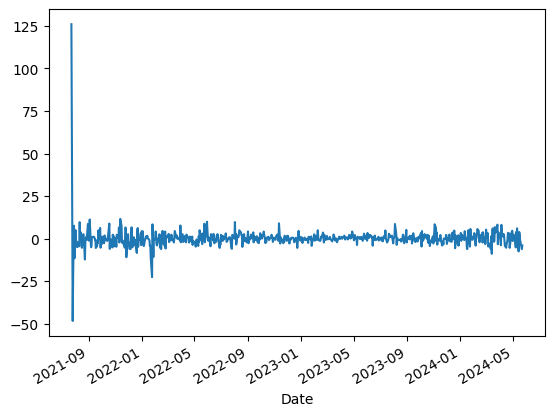

In [367]:
model_ARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

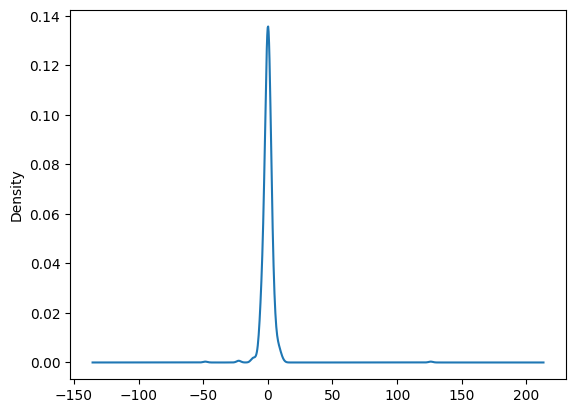

In [368]:
model_ARIMA_fit.resid.plot(kind='kde')

In [376]:
df.tail(21)

,Open,High,Low,Close,Adj Close,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference,Predicted_ARIMA
Date,,,,,,,,,,,,
2024-04-22,193.000000,197.699997,190.800003,193.350006,193.350006,28792292,190.750000,175.693334,168.140001,95.274189,4.150009,190.330725
2024-04-23,194.399994,194.500000,186.600006,187.449997,187.449997,35740731,190.445000,176.413334,169.090001,95.409941,-5.900009,192.837774
2024-04-24,189.000000,189.100006,183.149994,184.399994,184.399994,32622315,189.704999,177.175000,169.970001,95.540809,-3.050003,188.073881
2024-04-25,184.000000,188.899994,182.500000,184.699997,184.699997,38839521,188.804999,177.998333,170.782000,95.671733,0.300003,186.314637
2024-04-26,189.000000,190.449997,186.350006,188.100006,188.100006,33778145,187.925000,179.106667,171.555001,95.807258,3.400009,185.562495
2024-04-29,189.399994,194.300003,186.449997,193.600006,193.600006,33415230,188.075000,180.330000,172.351001,95.950439,5.500000,188.936824
2024-04-30,195.000000,196.949997,192.199997,193.149994,193.149994,39383265,188.559999,181.813334,173.119001,96.092544,-0.450012,194.518101
2024-05-02,193.600006,195.949997,192.750000,195.449997,195.449997,27391448,189.459999,183.236667,173.983000,96.237591,2.300003,193.053366
2024-05-03,196.800003,200.350006,193.100006,197.250000,197.250000,37882274,190.664999,184.476667,174.831000,96.384840,1.800003,195.596506


In [370]:
df['Predicted_ARIMA']=pred_arima
print(df['Predicted_ARIMA'].dropna())

Date
2024-04-22    190.330725
2024-04-23    192.837774
2024-04-24    188.073881
2024-04-25    186.314637
2024-04-26    185.562495
2024-04-29    188.936824
2024-04-30    194.518101
2024-05-02    193.053366
2024-05-03    195.596506
2024-05-06    198.479133
2024-05-07    196.623814
2024-05-08    191.567303
2024-05-09    196.321116
2024-05-10    195.236137
2024-05-13    201.555045
2024-05-14    194.776850
2024-05-15    188.095644
2024-05-16    193.124557
2024-05-17    195.944350
2024-05-21    195.237084
2024-05-22    189.488682
Name: Predicted_ARIMA, dtype: float64


<Axes: xlabel='Date'>

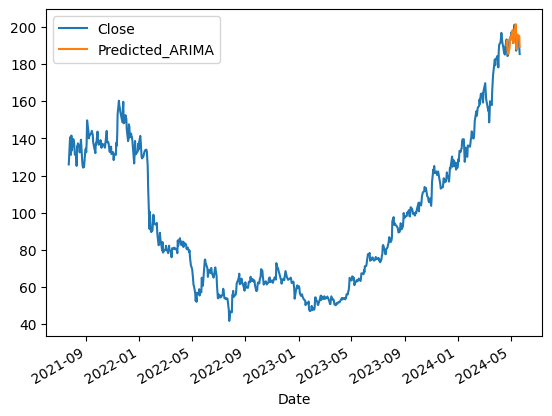

In [371]:
df[['Close','Predicted_ARIMA']].plot()

c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\valla\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


NameError: name 'df1' is not defined

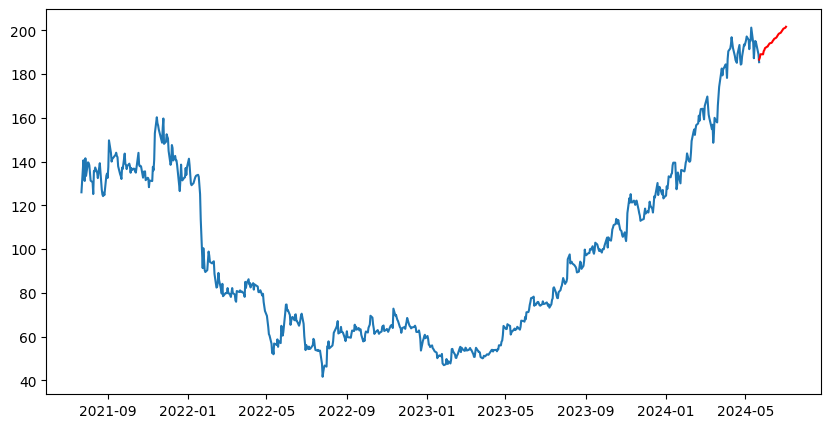

In [372]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [244]:
forecat_res = pd.DataFrame({'Date':df1['Date'],})

NameError: name 'df1' is not defined

df1['Close'].head(10)